# Combining Data

In [2]:
import pandas as pd
import numpy as np

customers = pd.read_csv("customers.csv", sep=",")
orders = pd.read_csv("orders.csv", sep=",")
products = pd.read_csv("products.csv", sep=",")
sales = pd.read_csv("sales.csv", sep=",")

In [10]:
products = products.rename(columns={'product_ID': 'product_id'})
complete = products.merge(sales, how = "inner", on = "product_id")
complete.head()

,product_id,product_type,product_name,size,colour,price,quantity_x,description,sales_id,order_id,price_per_unit,quantity_y,total_price
0,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",22,5,96,3,288
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1121,231,96,1,96
2,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1741,353,96,3,288
3,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",3201,644,96,2,192
4,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",4962,992,96,3,288


In [12]:
complete = complete.merge(orders, how = "inner", on = "order_id")
complete.head()

,product_id,product_type,product_name,size,colour,price,quantity_x,description,sales_id,order_id,price_per_unit,quantity_y,total_price,customer_id,payment,order_date,delivery_date
0,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",22,5,96,3,288,441,14719,2021-3-23,2021-03-24
1,148,Shirt,Linen,L,orange,116,73,"A orange coloured, L sized, Linen Shirt",20,5,91,2,182,441,14719,2021-3-23,2021-03-24
2,475,Jacket,Puffer,XS,blue,110,57,"A blue coloured, XS sized, Puffer Jacket",21,5,118,2,236,441,14719,2021-3-23,2021-03-24
3,635,Jacket,Coach,XS,orange,115,42,"A orange coloured, XS sized, Coach Jacket",25,5,93,3,279,441,14719,2021-3-23,2021-03-24
4,639,Jacket,Coach,XL,orange,115,46,"A orange coloured, XL sized, Coach Jacket",26,5,93,3,279,441,14719,2021-3-23,2021-03-24


In [13]:
complete = complete.merge(customers, how = "inner", on = "customer_id")
complete.head()

,product_id,product_type,product_name,size,colour,price,quantity_x,description,sales_id,order_id,...,order_date,delivery_date,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",22,5,...,2021-3-23,2021-03-24,Artemas Vasilischev,Bigender,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia
1,148,Shirt,Linen,L,orange,116,73,"A orange coloured, L sized, Linen Shirt",20,5,...,2021-3-23,2021-03-24,Artemas Vasilischev,Bigender,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia
2,475,Jacket,Puffer,XS,blue,110,57,"A blue coloured, XS sized, Puffer Jacket",21,5,...,2021-3-23,2021-03-24,Artemas Vasilischev,Bigender,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia
3,635,Jacket,Coach,XS,orange,115,42,"A orange coloured, XS sized, Coach Jacket",25,5,...,2021-3-23,2021-03-24,Artemas Vasilischev,Bigender,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia
4,639,Jacket,Coach,XL,orange,115,46,"A orange coloured, XL sized, Coach Jacket",26,5,...,2021-3-23,2021-03-24,Artemas Vasilischev,Bigender,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia


In [14]:
complete.to_csv("complete_regression.csv", encoding='utf-8', index=False)

# New Dataset with Binned Data

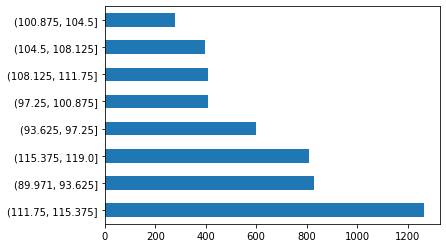

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('complete_regression.csv')

# adding new column for bin category
# split into 8 bins of equal interval width
df["bins"] = pd.cut(df['price'], bins = 8)
df.pop("price")
# df['bins'] = df['bins'].str.replace(',','-')
df.head()
df.loc["bins"] = df["bins"].astype("object")
df.to_csv("complete_binned.csv", encoding='utf-8', index=False)

# df['bins'].value_counts().plot(kind='barh')
# plt.show()